In [1]:
import os
os.chdir("C:\\Users\\rymms\Desktop\\20180900\\진로\\학부연구생\\220303 메일 전")

In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [3]:
df = pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")
df

C:\Users\rymms\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,389,433,11,4,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,1088,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,80,579225,132,150,160,320799,160,0,1.212121,13.926212,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,49666,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,49413,4,3,0,18,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
print(len(df))

692703


In [5]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

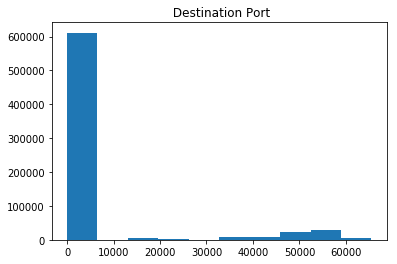

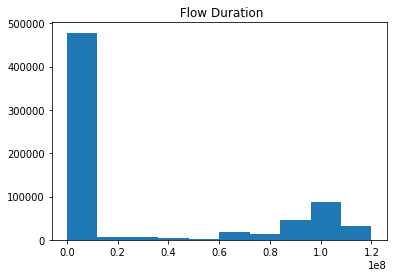

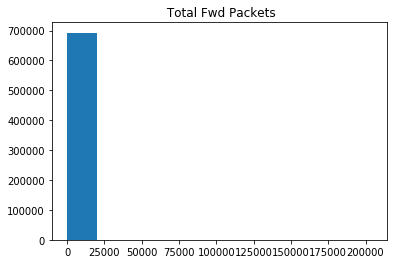

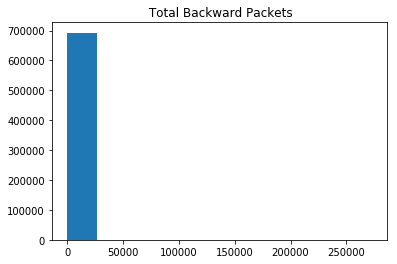

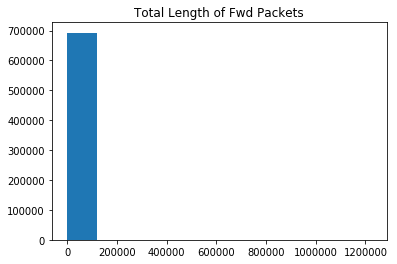

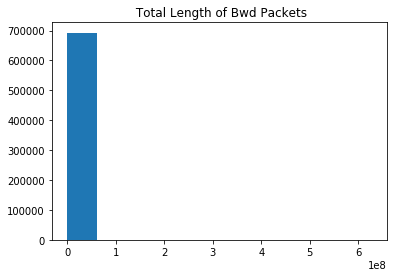

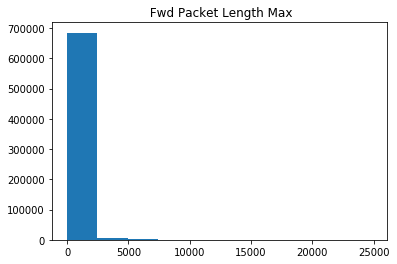

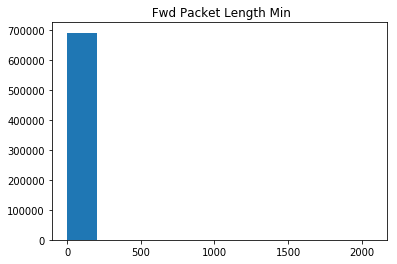

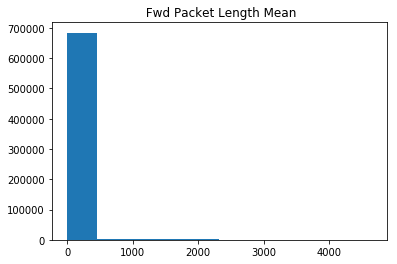

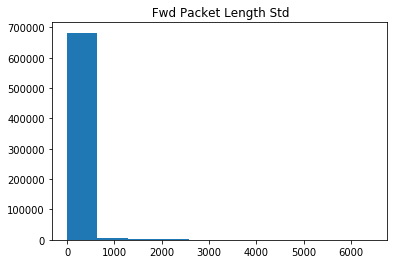

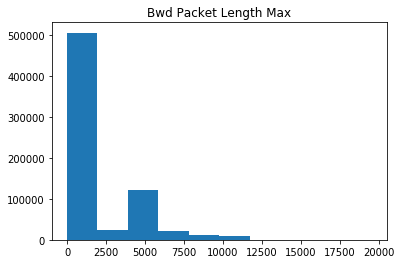

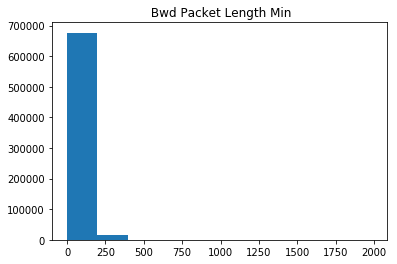

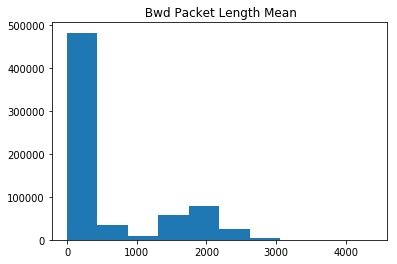

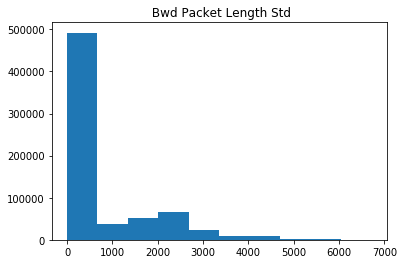

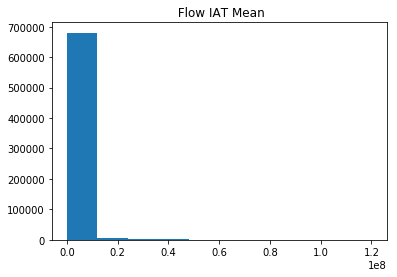

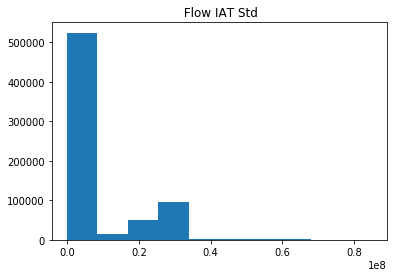

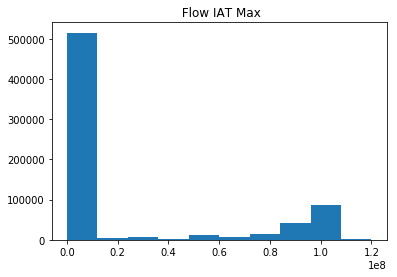

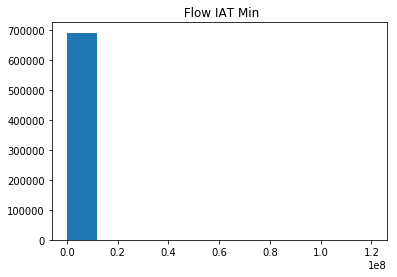

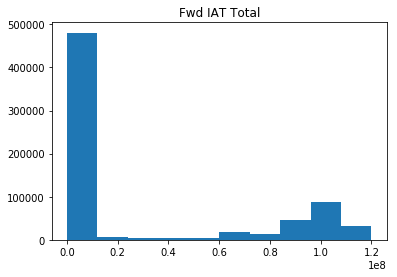

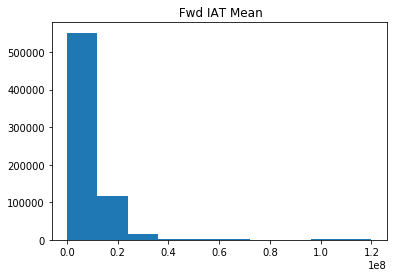

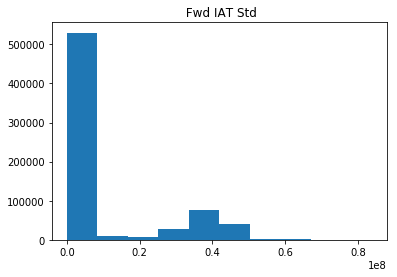

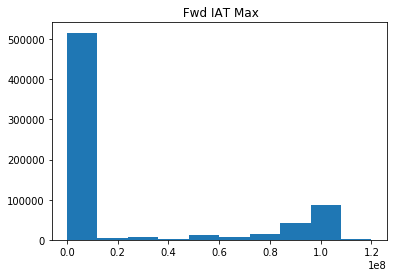

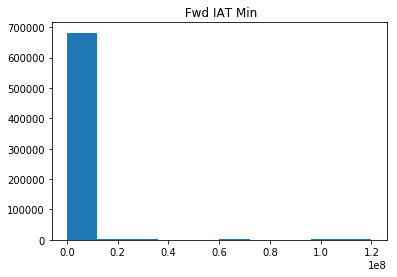

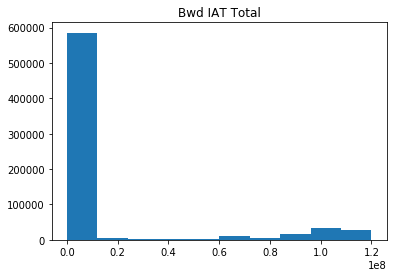

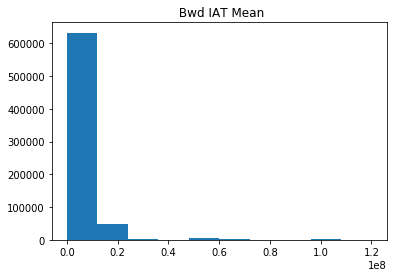

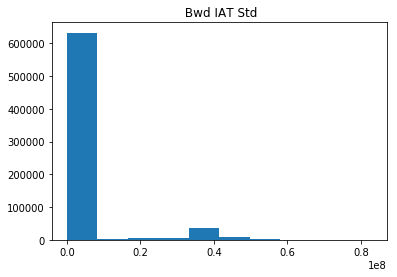

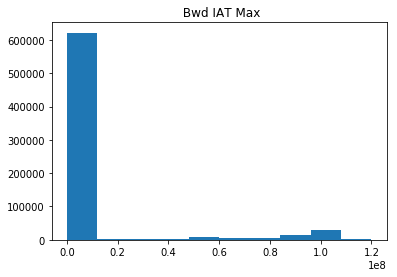

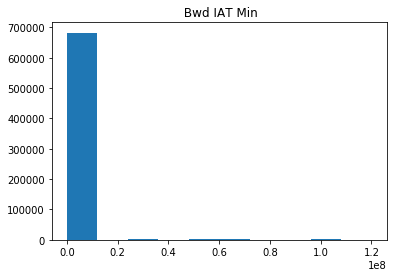

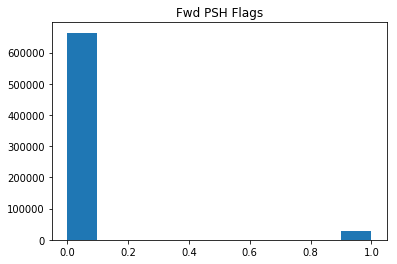

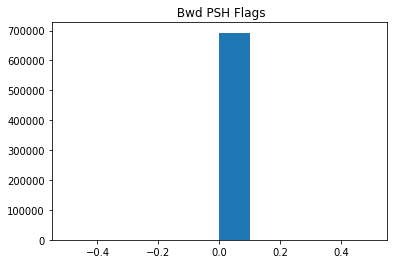

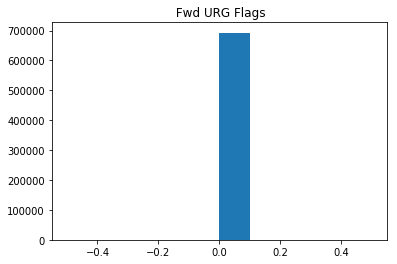

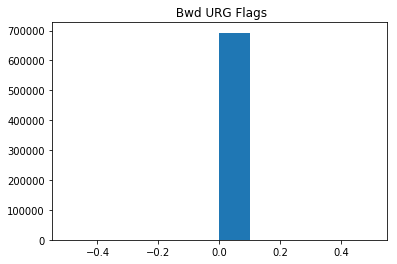

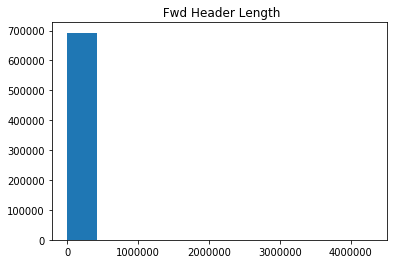

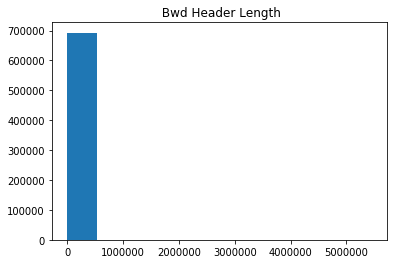

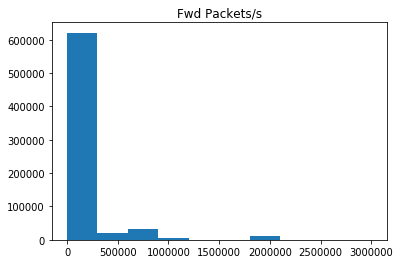

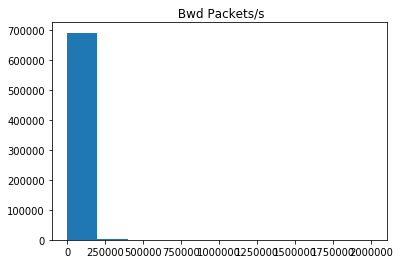

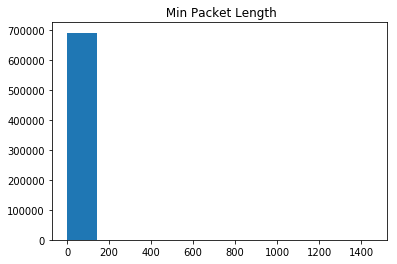

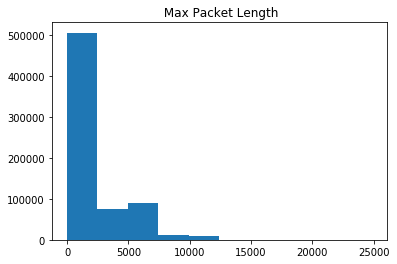

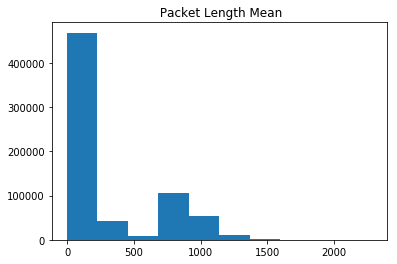

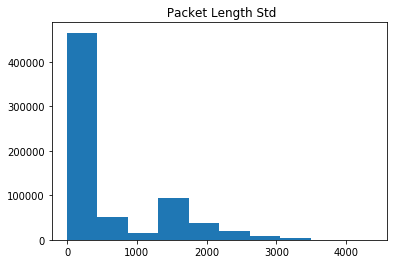

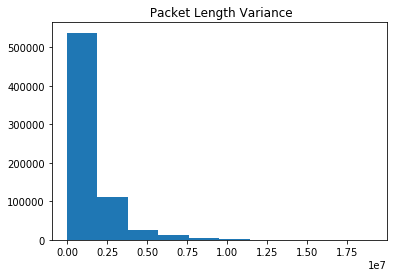

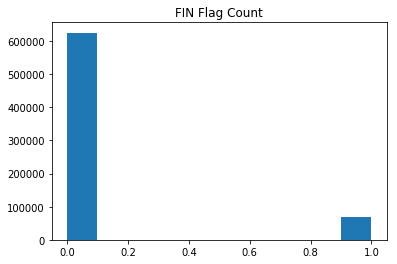

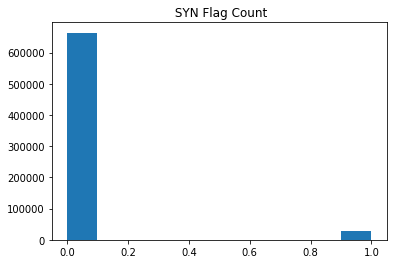

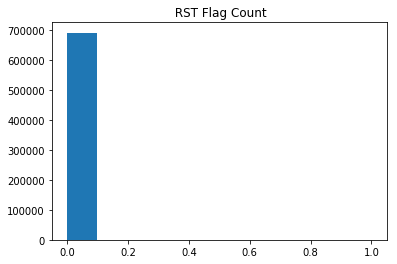

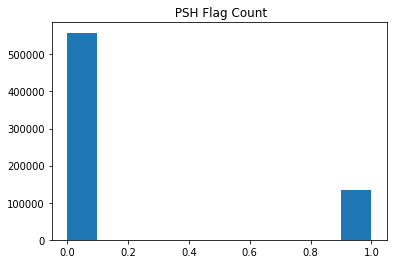

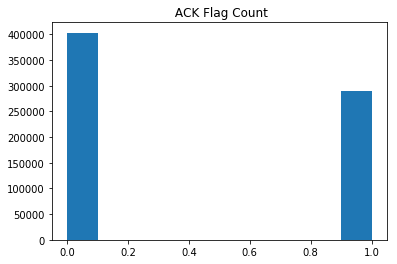

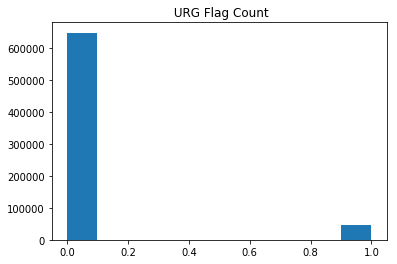

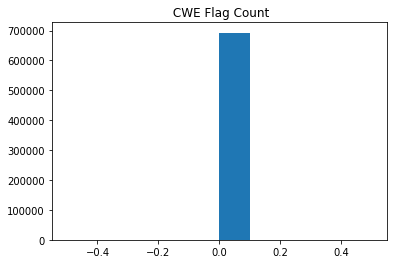

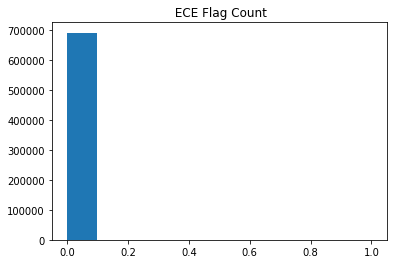

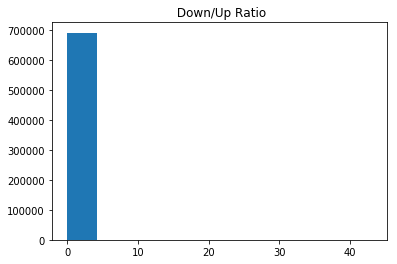

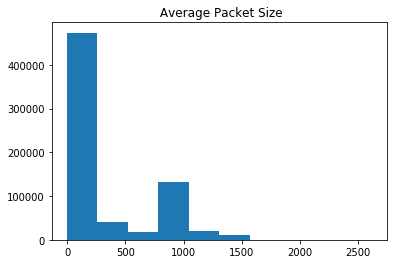

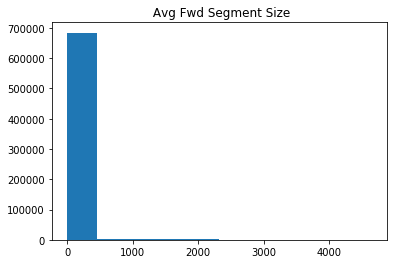

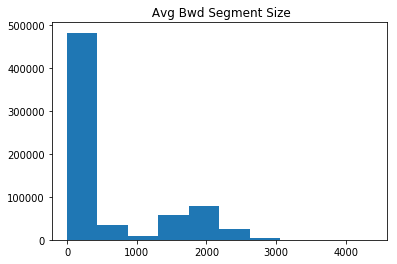

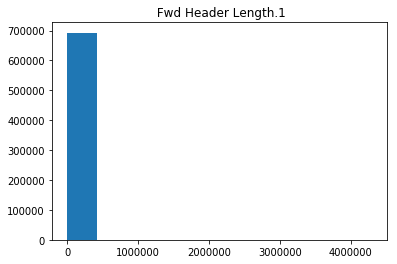

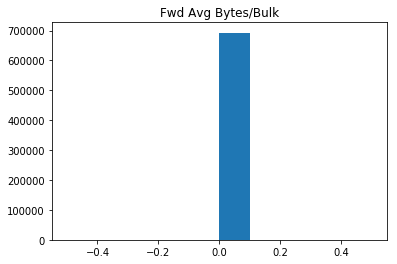

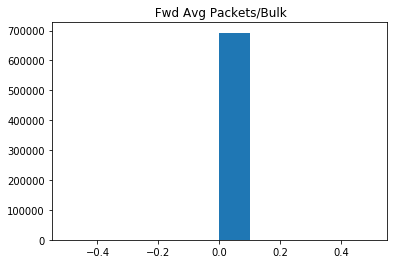

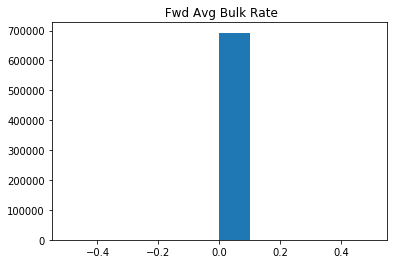

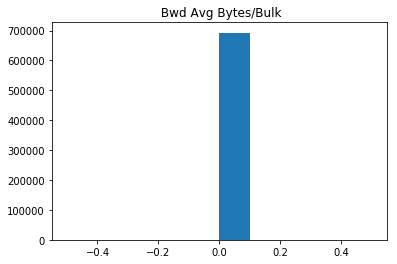

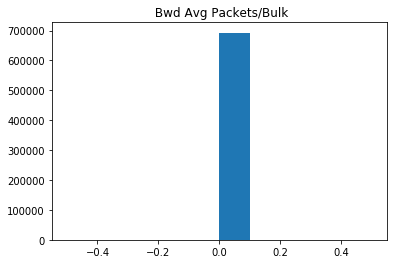

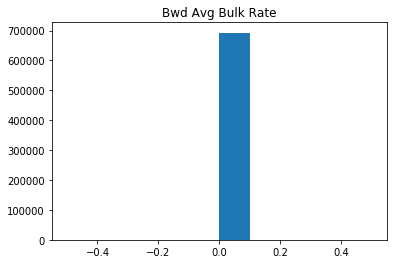

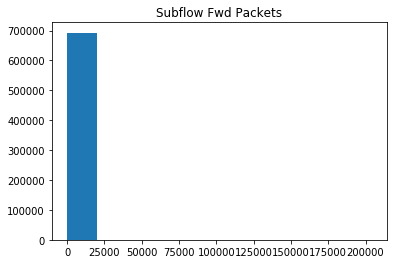

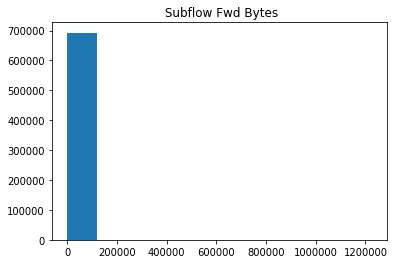

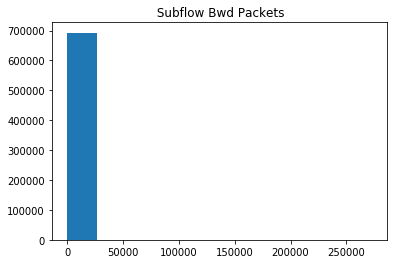

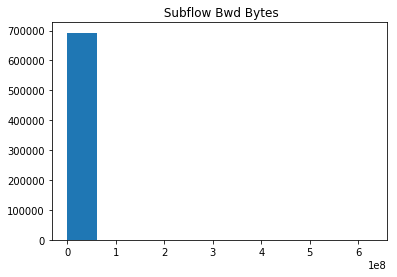

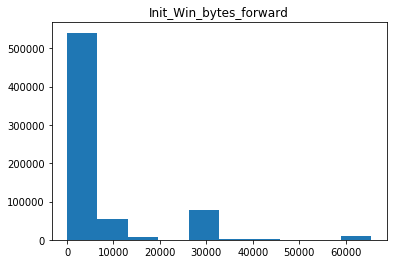

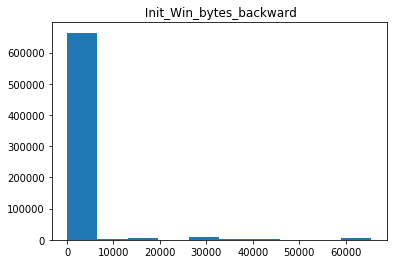

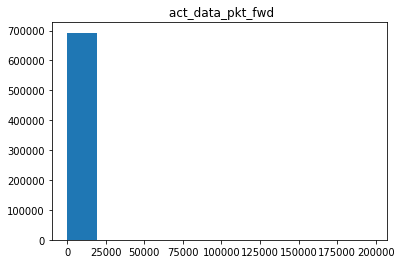

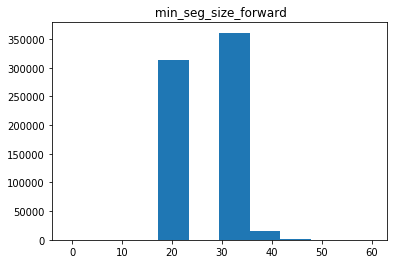

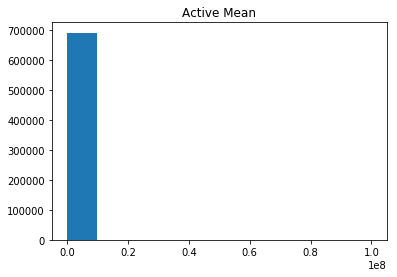

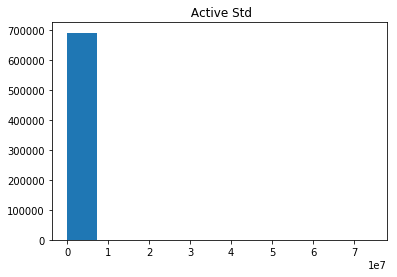

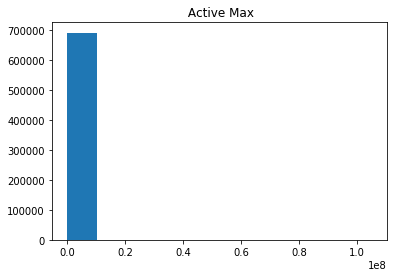

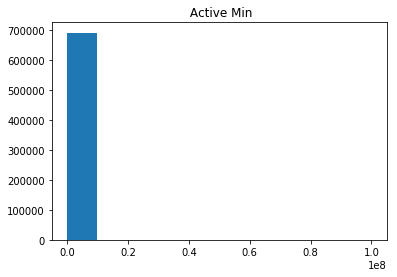

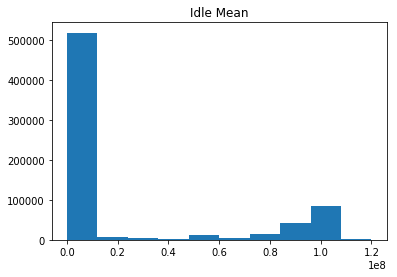

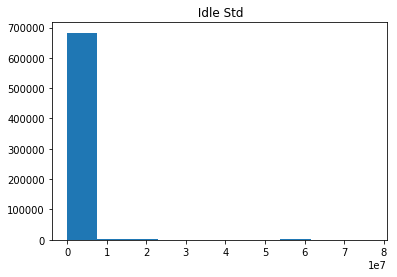

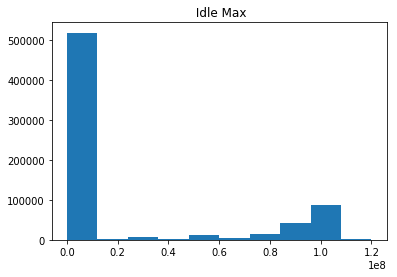

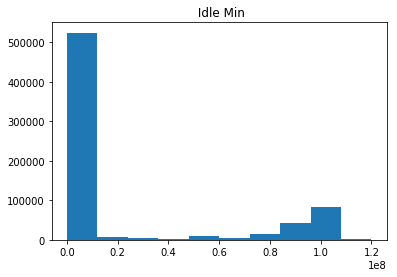

In [6]:
for colname in df.columns:
    col = df[colname]
#     print(colname, col.dtypes)
    if col.dtypes in ['int64','float64']:
#         print(len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
#               max(col[np.isfinite(col)]), min(col[np.isfinite(col)]),len(col.unique()))
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

In [7]:
labels = df[' Label'].unique()
lb_count = []
for lb in labels:
    lb_count.append(sum(df[' Label']==lb))
    print(lb,",",sum(df[' Label']==lb))

BENIGN , 440031
DoS slowloris , 5796
DoS Slowhttptest , 5499
DoS Hulk , 231073
DoS GoldenEye , 10293
Heartbleed , 11


In [8]:
df_nodup = df.drop_duplicates()
df_nodup

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,389,433,11,4,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,1088,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,80,579225,132,150,160,320799,160,0,1.212121,13.926212,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,49666,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,49413,4,3,0,18,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [9]:
labels = df_nodup[' Label'].unique()
lb_count = []
for lb in labels:
    lb_count.append(sum(df_nodup[' Label']==lb))
    print(lb,",",sum(df_nodup[' Label']==lb))

BENIGN , 418569
DoS slowloris , 5385
DoS Slowhttptest , 5242
DoS Hulk , 173794
DoS GoldenEye , 10286
Heartbleed , 11


In [10]:
cn = ' Destination Port'
attrs = df[cn].unique()
attr_count = []
for att in attrs:
    if sum(df[cn]==att)>100:
        attr_count.append(sum(df[cn]==att))
        print(att,",",sum(df[cn]==att))

80 , 301422
389 , 1136
88 , 932
49666 , 127
3268 , 476
443 , 100229
135 , 141
21 , 1112
22 , 2169
465 , 691
5353 , 148
123 , 4293
0 , 330
445 , 259
53 , 195531
138 , 326
139 , 578
137 , 1480


In [11]:
# ax = df[' Label'].value_counts().plot(kind='bar')
# # for i in range(len(labels)):
# #     ax.text(i-0.2,100000, str(lb_count[i]), color='red', fontweight='bold')

In [12]:
# ax = df_nodup[' Label'].value_counts().plot(kind='bar')
# # for i in range(len(labels)):
# #     ax.text(i-0.2,100000, str(lb_count[i]), color='red', fontweight='bold')

## Classification
### Binary (attack/benign)

In [13]:
import torch

In [14]:
def set_binary_label(df, label_col, default_class='BENIGN'):
    df_y = df[label_col].copy()
    rep_class = {}
    lab_names = df_y.unique()
    for lab in lab_names:
        if lab == default_class:
            rep_class[lab] = 0
        else:
            rep_class[lab] = 1
    df_y.replace(rep_class)
    return df_y

def set_multiple_label(df, label_col, label_dic):
    df_y = df[label_col].copy()
    lab_names = df_y.unique()
    drop_idx = pd.Index([])
    for lab in lab_names:
        if lab in label_dic.keys():
#             print('pass', lab)
            pass
        else:
            print('drop', lab)
            drop_idx = drop_idx.append(df[df[label_col]==lab].index)  
    print("original instances: ",len(df))
    print("drop intances: ", len(drop_idx))
    df = df.drop(drop_idx)
    print("after drop: ",len(df))
#     del df_y, drop_idx
    df.replace({label_col:label_dic},inplace = True)
    return df

In [15]:
# lab_cluster = {0: ['Web Attack � Brute Force','Web Attack � XSS','Web Attack � Sql Injection'],
#              1: ['DDoS'],
#              2: ['Bot'],
#              3: ['DoS slowloris','DoS Slowhttptest','DoS Hulk','DoS GoldenEye'],
#              4: ['PortScan'],
#              5: ['FTP-Patator'],
#              6: ['SSH-Patator']    
# }
# lab_dic = {}
# for nlab in lab_cluster:
#     for lab in lab_cluster[nlab]:
#         lab_dic[lab] = nlab
# print(lab_dic)

In [16]:
df_y = set_binary_label(df,label_col=' Label', default_class='BENIGN')

In [17]:
df_y

0                BENIGN
1                BENIGN
2                BENIGN
3                BENIGN
4                BENIGN
5                BENIGN
6                BENIGN
7                BENIGN
8                BENIGN
9                BENIGN
10               BENIGN
11               BENIGN
12               BENIGN
13               BENIGN
14               BENIGN
15               BENIGN
16               BENIGN
17               BENIGN
18               BENIGN
19               BENIGN
20               BENIGN
21               BENIGN
22               BENIGN
23               BENIGN
24               BENIGN
25               BENIGN
26               BENIGN
27               BENIGN
28               BENIGN
29               BENIGN
              ...      
692673           BENIGN
692674           BENIGN
692675           BENIGN
692676           BENIGN
692677           BENIGN
692678           BENIGN
692679           BENIGN
692680           BENIGN
692681    DoS GoldenEye
692682           BENIGN
692683          

In [18]:
labels = df_nodup[' Label'].unique()
lb_count = []
for lb in labels:
    lb_count.append(sum(df_nodup[' Label']==lb))
    print(lb,",",sum(df_nodup[' Label']==lb))

BENIGN , 418569
DoS slowloris , 5385
DoS Slowhttptest , 5242
DoS Hulk , 173794
DoS GoldenEye , 10286
Heartbleed , 11


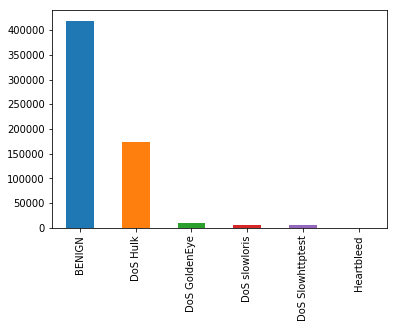

In [19]:
df_nodup[' Label'].value_counts().plot(kind='bar')

In [20]:
labels = df_nodup[' Label']
ab = []
for i in labels:
    if i == 'BENIGN':
        ab.append(1)
    else:
        ab.append(0)

In [21]:
print(len(ab))

613287


In [22]:
anomaly = 0
benign = 0

for i in range(len(ab)):
    if ab[i] == 1:
        benign += 1
    else:
        anomaly += 1

In [23]:
print(anomaly, benign)

194718 418569


In [24]:
df_b = df_nodup[(df_nodup[' Label']=='BENIGN')]
df_b

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,389,433,11,4,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,88,1088,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,80,579225,132,150,160,320799,160,0,1.212121,13.926212,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,49666,3,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,49413,4,3,0,18,0,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [25]:
df_b.reset_index(inplace=True)

In [26]:
df_benign = df_b[:194718]
df_benign

,index,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,80,38308,1,1,6,6,6,6,6.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,1,389,479,11,5,172,326,79,0,15.636364,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,2,88,1095,10,6,3150,3150,1575,0,315.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,3,389,15206,17,12,3452,6660,1313,0,203.058824,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,4,88,1092,9,6,3150,3152,1575,0,350.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5,5,389,433,11,4,172,326,79,0,15.636364,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
6,6,88,1088,9,6,3150,3152,1575,0,350.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
7,7,80,579225,132,150,160,320799,160,0,1.212121,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
8,8,49666,3,2,0,12,0,6,6,6.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
9,9,49413,4,3,0,18,0,6,6,6.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [27]:
df_a = df_nodup[(df_nodup[' Label'] == 'DoS slowloris') | (df_nodup[' Label'] == 'DoS Slowhttptest') | (df_nodup[' Label'] == 'DoS Hulk') | (df_nodup[' Label'] == 'DoS GoldenEye')]

In [28]:
df_a.reset_index(inplace=True)
df_anomaly = df_a[:194718]
df_anomaly

,index,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6558,80,5169956,8,6,1101,4222,410,0,137.625000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
1,26700,80,229,2,0,12,0,6,6,6.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
2,26701,80,5001928,3,1,12,0,6,0,4.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
3,26702,80,5125872,8,7,1659,2514,467,0,207.375000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
4,26703,80,214,2,0,12,0,6,6,6.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
5,26704,80,5001683,3,1,0,0,0,0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
6,26705,80,507096,6,1,693,0,231,0,115.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
7,26706,80,507376,6,1,693,0,231,0,115.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
8,26707,80,507477,6,1,693,0,231,0,115.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
9,26708,80,507581,6,1,693,0,231,0,115.500000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris


In [29]:
sameratio = pd.concat([df_anomaly, df_benign], axis=0)
sameratio.reset_index(inplace=True)
sameratio

,level_0,index,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,6558,80,5169956,8,6,1101,4222,410,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
1,1,26700,80,229,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
2,2,26701,80,5001928,3,1,12,0,6,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
3,3,26702,80,5125872,8,7,1659,2514,467,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
4,4,26703,80,214,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
5,5,26704,80,5001683,3,1,0,0,0,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
6,6,26705,80,507096,6,1,693,0,231,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
7,7,26706,80,507376,6,1,693,0,231,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
8,8,26707,80,507477,6,1,693,0,231,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris
9,9,26708,80,507581,6,1,693,0,231,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,DoS slowloris


#### anomaly, benign 비율 맞춘 데이터셋 완료
- benign은 0, DoS 공격들은 1

In [30]:
sameratio.replace(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed'], [0,1,1,1,1,1], inplace=True)
sameratio

,level_0,index,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,6558,80,5169956,8,6,1101,4222,410,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,1,26700,80,229,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2,2,26701,80,5001928,3,1,12,0,6,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
3,3,26702,80,5125872,8,7,1659,2514,467,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4,4,26703,80,214,2,0,12,0,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
5,5,26704,80,5001683,3,1,0,0,0,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
6,6,26705,80,507096,6,1,693,0,231,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
7,7,26706,80,507376,6,1,693,0,231,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
8,8,26707,80,507477,6,1,693,0,231,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
9,9,26708,80,507581,6,1,693,0,231,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1


In [31]:
sameratio2 = sameratio[[' Destination Port', ' Flow Duration', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Average Packet Size', ' Idle Std', ' Label']]
sameratio2

,Destination Port,Flow Duration,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Average Packet Size,Idle Std,Label
0,80,5169956,3.976889e+05,1.368409e+06,4951173,112,218783,380.214286,0.0,1
1,80,229,2.290000e+02,0.000000e+00,229,229,229,9.000000,0.0,1
2,80,5001928,1.667309e+06,2.886996e+06,5000925,127,5001928,3.000000,0.0,1
3,80,5125872,3.661337e+05,1.320784e+06,4954614,73,171258,278.200000,0.0,1
4,80,214,2.140000e+02,0.000000e+00,214,214,214,9.000000,0.0,1
5,80,5001683,1.667228e+06,2.886874e+06,5000703,137,5001683,0.000000,0.0,1
6,80,507096,8.451600e+04,9.819110e+04,200175,17,507096,99.000000,0.0,1
7,80,507376,8.456267e+04,9.823403e+04,200174,16,507376,99.000000,0.0,1
8,80,507477,8.457950e+04,9.821507e+04,199941,32,507477,99.000000,0.0,1
9,80,507581,8.459683e+04,9.816409e+04,200175,61,507581,99.000000,0.0,1


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(sameratio2)
print(scaled)

[[1.22740802e-03 4.30829754e-02 3.31408266e-03 ... 1.66192705e-01
  0.00000000e+00 1.00000000e+00]
 [1.22740802e-03 1.91666668e-06 1.91666665e-06 ... 3.93392464e-03
  0.00000000e+00 1.00000000e+00]
 [1.22740802e-03 4.16827420e-02 1.38942527e-02 ... 1.31130821e-03
  0.00000000e+00 1.00000000e+00]
 ...
 [6.79677192e-03 3.13750836e-03 2.41354485e-04 ... 1.30006843e-01
  0.00000000e+00 0.00000000e+00]
 [6.79677192e-03 3.13565836e-03 2.85067422e-04 ... 1.51456098e-01
  0.00000000e+00 0.00000000e+00]
 [6.79677192e-03 3.13507503e-03 2.61263887e-04 ... 1.39805629e-01
  0.00000000e+00 0.00000000e+00]]


In [33]:
X = scaled[:, :-1]
y = scaled[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

In [34]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(249232, 9) (249232,)
(62308, 9) (62308,)
(77885, 9) (77885,)


In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_val, y_val)*100, 2)
print('KNN validation 정확도 :', acc_knn)
acc_knn = round(knn.score(X_test, y_test)*100, 2)
print('KNN test 정확도 :', acc_knn)

KNN validation 정확도 : 99.56
KNN test 정확도 : 99.55


In [36]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree  = round(decision_tree.score(X_val, y_val)*100, 2)
print('decision tree validation 정확도 :', acc_decision_tree)
acc_decision_tree  = round(decision_tree.score(X_test, y_test)*100, 2)
print('decision tree test 정확도 :', acc_decision_tree)

decision tree validation 정확도 : 99.69
decision tree test 정확도 : 99.69


In [37]:
sameratio3 = sameratio[[' Flow Duration', ' Flow IAT Mean', ' Flow IAT Std', 'Fwd IAT Total', ' Average Packet Size', ' Label']]
sameratio3

,Flow Duration,Flow IAT Mean,Flow IAT Std,Fwd IAT Total,Average Packet Size,Label
0,5169956,3.976889e+05,1.368409e+06,218783,380.214286,1
1,229,2.290000e+02,0.000000e+00,229,9.000000,1
2,5001928,1.667309e+06,2.886996e+06,5001928,3.000000,1
3,5125872,3.661337e+05,1.320784e+06,171258,278.200000,1
4,214,2.140000e+02,0.000000e+00,214,9.000000,1
5,5001683,1.667228e+06,2.886874e+06,5001683,0.000000,1
6,507096,8.451600e+04,9.819110e+04,507096,99.000000,1
7,507376,8.456267e+04,9.823403e+04,507376,99.000000,1
8,507477,8.457950e+04,9.821507e+04,507477,99.000000,1
9,507581,8.459683e+04,9.816409e+04,507581,99.000000,1


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled2 = scaler.fit_transform(sameratio3)

X = scaled2[:, :-1]
y = scaled2[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(249232, 5) (249232,)
(62308, 5) (62308,)
(77885, 5) (77885,)


In [39]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree  = round(decision_tree.score(X_val, y_val)*100, 2)
print('decision tree validation 정확도 :', acc_decision_tree)
acc_decision_tree  = round(decision_tree.score(X_test, y_test)*100, 2)
print('decision tree test 정확도 :', acc_decision_tree)

decision tree validation 정확도 : 97.82
decision tree test 정확도 : 97.76


##### port와 flow duration 등의 정보를 제외하니 정확도는 떨어지긴 했지만 여전히 높음

In [40]:
## ' Flow Packets/s' 제외
sameratio4 = sameratio[[' Flow Duration', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Mean', ' Bwd Packet Length Mean', ' Flow IAT Mean', ' Flow IAT Std', 'Fwd Packets/s', ' Bwd Packets/s', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' Average Packet Size', 'Idle Mean', ' Idle Std', ' Label']]
sameratio4

,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Flow IAT Mean,Flow IAT Std,Fwd Packets/s,Bwd Packets/s,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,Average Packet Size,Idle Mean,Idle Std,Label
0,5169956,1101,4222,137.625000,703.666667,3.976889e+05,1.368409e+06,1.547402,1.160551,354.866667,895.115146,801231.123800,0,380.214286,0.0,0.0,1
1,229,12,0,6.000000,0.000000,2.290000e+02,0.000000e+00,8733.624454,0.000000,6.000000,0.000000,0.000000,0,9.000000,0.0,0.0,1
2,5001928,12,0,4.000000,0.000000,1.667309e+06,2.886996e+06,0.599769,0.199923,2.400000,3.286335,10.800000,0,3.000000,0.0,0.0,1
3,5125872,1659,2514,207.375000,359.142857,3.661337e+05,1.320784e+06,1.560710,1.365621,260.812500,322.554847,104041.629200,0,278.200000,0.0,0.0,1
4,214,12,0,6.000000,0.000000,2.140000e+02,0.000000e+00,9345.794393,0.000000,6.000000,0.000000,0.000000,0,9.000000,0.0,0.0,1
5,5001683,0,0,0.000000,0.000000,1.667228e+06,2.886874e+06,0.599798,0.199933,0.000000,0.000000,0.000000,0,0.000000,0.0,0.0,1
6,507096,693,0,115.500000,0.000000,8.451600e+04,9.819110e+04,11.832079,1.972013,86.625000,119.553858,14293.125000,0,99.000000,0.0,0.0,1
7,507376,693,0,115.500000,0.000000,8.456267e+04,9.823403e+04,11.825549,1.970925,86.625000,119.553858,14293.125000,0,99.000000,0.0,0.0,1
8,507477,693,0,115.500000,0.000000,8.457950e+04,9.821507e+04,11.823196,1.970533,86.625000,119.553858,14293.125000,0,99.000000,0.0,0.0,1
9,507581,693,0,115.500000,0.000000,8.459683e+04,9.816409e+04,11.820773,1.970129,86.625000,119.553858,14293.125000,0,99.000000,0.0,0.0,1


In [41]:
sameratio4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389425 entries, 0 to 389424
Data columns (total 17 columns):
 Flow Duration                  389425 non-null int64
Total Length of Fwd Packets     389425 non-null int64
 Total Length of Bwd Packets    389425 non-null int64
 Fwd Packet Length Mean         389425 non-null float64
 Bwd Packet Length Mean         389425 non-null float64
 Flow IAT Mean                  389425 non-null float64
 Flow IAT Std                   389425 non-null float64
Fwd Packets/s                   389425 non-null float64
 Bwd Packets/s                  389425 non-null float64
 Packet Length Mean             389425 non-null float64
 Packet Length Std              389425 non-null float64
 Packet Length Variance         389425 non-null float64
FIN Flag Count                  389425 non-null int64
 Average Packet Size            389425 non-null float64
Idle Mean                       389425 non-null float64
 Idle Std                       389425 non-null float64
 

In [42]:
#sameratio4.isnull().values.any()
sameratio4.isnull().sum()

 Flow Duration                  0
Total Length of Fwd Packets     0
 Total Length of Bwd Packets    0
 Fwd Packet Length Mean         0
 Bwd Packet Length Mean         0
 Flow IAT Mean                  0
 Flow IAT Std                   0
Fwd Packets/s                   0
 Bwd Packets/s                  0
 Packet Length Mean             0
 Packet Length Std              0
 Packet Length Variance         0
FIN Flag Count                  0
 Average Packet Size            0
Idle Mean                       0
 Idle Std                       0
 Label                          0
dtype: int64

In [43]:
# from sklearn.preprocessing import Imputer
# #from sklearn.impute import SimpleImputer
# imp = Imputer(missing_values=np.NaN, strategy="mean")

# #tcp['tcp_src'] = imp.fit_transform(tcp['tcp_src'].values.reshape(-1,1))[:,0]
# sameratio4 = imp.fit_transform(sameratio4.values.reshape(-1,1))[:,0]

In [44]:
sameratio4[' Fwd Packet Length Mean'] = sameratio4[' Fwd Packet Length Mean'].round(0).astype(int)
sameratio4[' Bwd Packet Length Mean'] = sameratio4[' Bwd Packet Length Mean'].round(0).astype(int)
sameratio4[' Flow IAT Mean'] = sameratio4[' Flow IAT Mean'].round(0).astype(int)
sameratio4[' Flow IAT Std'] = sameratio4[' Flow IAT Std'].round(0).astype(int)
sameratio4['Fwd Packets/s'] = sameratio4['Fwd Packets/s'].round(0).astype(int)
sameratio4[' Bwd Packets/s'] = sameratio4[' Bwd Packets/s'].round(0).astype(int)
sameratio4[' Packet Length Mean'] = sameratio4[' Packet Length Mean'].round(0).astype(int)
sameratio4[' Packet Length Std'] = sameratio4[' Packet Length Std'].round(0).astype(int)
sameratio4[' Packet Length Variance'] = sameratio4[' Packet Length Variance'].round(0).astype(int)
sameratio4[' Average Packet Size'] = sameratio4[' Average Packet Size'].round(0).astype(int)
sameratio4['Idle Mean'] = sameratio4['Idle Mean'].round(0).astype(int)
sameratio4[' Idle Std'] = sameratio4[' Idle Std'].round(0).astype(int)

C:\Users\rymms\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rymms\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rymms\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [45]:
sameratio4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389425 entries, 0 to 389424
Data columns (total 17 columns):
 Flow Duration                  389425 non-null int64
Total Length of Fwd Packets     389425 non-null int64
 Total Length of Bwd Packets    389425 non-null int64
 Fwd Packet Length Mean         389425 non-null int32
 Bwd Packet Length Mean         389425 non-null int32
 Flow IAT Mean                  389425 non-null int32
 Flow IAT Std                   389425 non-null int32
Fwd Packets/s                   389425 non-null int32
 Bwd Packets/s                  389425 non-null int32
 Packet Length Mean             389425 non-null int32
 Packet Length Std              389425 non-null int32
 Packet Length Variance         389425 non-null int32
FIN Flag Count                  389425 non-null int64
 Average Packet Size            389425 non-null int32
Idle Mean                       389425 non-null int32
 Idle Std                       389425 non-null int32
 Label                   

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled3 = scaler.fit_transform(sameratio4)

X = scaled3[:, :-1]
y = scaled3[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(249232, 16) (249232,)
(62308, 16) (62308,)
(77885, 16) (77885,)


In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_val, y_val)*100, 2)
print('KNN validation 정확도 :', acc_knn)
acc_knn = round(knn.score(X_test, y_test)*100, 2)
print('KNN test 정확도 :', acc_knn)

KNN validation 정확도 : 99.31
KNN test 정확도 : 99.27


In [48]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree  = round(decision_tree.score(X_val, y_val)*100, 2)
print('decision tree validation 정확도 :', acc_decision_tree)
acc_decision_tree  = round(decision_tree.score(X_test, y_test)*100, 2)
print('decision tree test 정확도 :', acc_decision_tree)

decision tree validation 정확도 : 99.37
decision tree test 정확도 : 99.37


In [49]:
## ' Flow Packets/s' 제외
sameratio5 = sameratio[[' Flow Duration', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Flow IAT Mean', ' Packet Length Mean', 'FIN Flag Count', ' Average Packet Size', 'Idle Mean', ' Label']]
sameratio5

,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Flow IAT Mean,Packet Length Mean,FIN Flag Count,Average Packet Size,Idle Mean,Label
0,5169956,1101,4222,3.976889e+05,354.866667,0,380.214286,0.0,1
1,229,12,0,2.290000e+02,6.000000,0,9.000000,0.0,1
2,5001928,12,0,1.667309e+06,2.400000,0,3.000000,0.0,1
3,5125872,1659,2514,3.661337e+05,260.812500,0,278.200000,0.0,1
4,214,12,0,2.140000e+02,6.000000,0,9.000000,0.0,1
5,5001683,0,0,1.667228e+06,0.000000,0,0.000000,0.0,1
6,507096,693,0,8.451600e+04,86.625000,0,99.000000,0.0,1
7,507376,693,0,8.456267e+04,86.625000,0,99.000000,0.0,1
8,507477,693,0,8.457950e+04,86.625000,0,99.000000,0.0,1
9,507581,693,0,8.459683e+04,86.625000,0,99.000000,0.0,1


In [51]:
sameratio5.isnull().sum()

 Flow Duration                  0
Total Length of Fwd Packets     0
 Total Length of Bwd Packets    0
 Flow IAT Mean                  0
 Packet Length Mean             0
FIN Flag Count                  0
 Average Packet Size            0
Idle Mean                       0
 Label                          0
dtype: int64

In [52]:
sameratio5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389425 entries, 0 to 389424
Data columns (total 9 columns):
 Flow Duration                  389425 non-null int64
Total Length of Fwd Packets     389425 non-null int64
 Total Length of Bwd Packets    389425 non-null int64
 Flow IAT Mean                  389425 non-null float64
 Packet Length Mean             389425 non-null float64
FIN Flag Count                  389425 non-null int64
 Average Packet Size            389425 non-null float64
Idle Mean                       389425 non-null float64
 Label                          389425 non-null int64
dtypes: float64(4), int64(5)
memory usage: 26.7 MB


In [53]:
sameratio5[' Flow IAT Mean'] = sameratio5[' Flow IAT Mean'].round(0).astype(int)
sameratio5[' Packet Length Mean'] = sameratio5[' Packet Length Mean'].round(0).astype(int)
sameratio5[' Average Packet Size'] = sameratio5[' Average Packet Size'].round(0).astype(int)
sameratio5['Idle Mean'] = sameratio5['Idle Mean'].round(0).astype(int)

C:\Users\rymms\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rymms\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rymms\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled4 = scaler.fit_transform(sameratio5)

X = scaled4[:, :-1]
y = scaled4[:, -1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=100)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(190817, 8) (190817,)
(81780, 8) (81780,)
(116828, 8) (116828,)


In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_val, y_val)*100, 2)
print('KNN validation 정확도 :', acc_knn)
acc_knn = round(knn.score(X_test, y_test)*100, 2)
print('KNN test 정확도 :', acc_knn)

KNN validation 정확도 : 99.13
KNN test 정확도 : 99.13


In [56]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree  = round(decision_tree.score(X_val, y_val)*100, 2)
print('decision tree validation 정확도 :', acc_decision_tree)
acc_decision_tree  = round(decision_tree.score(X_test, y_test)*100, 2)
print('decision tree test 정확도 :', acc_decision_tree)

decision tree validation 정확도 : 98.58
decision tree test 정확도 : 98.54


In [57]:
## ' Flow Packets/s' 제외
sameratio6 = sameratio[[' Flow Duration', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Flow IAT Mean', ' Packet Length Mean', ' Average Packet Size', ' Label']]
sameratio6

,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Flow IAT Mean,Packet Length Mean,Average Packet Size,Label
0,5169956,1101,4222,3.976889e+05,354.866667,380.214286,1
1,229,12,0,2.290000e+02,6.000000,9.000000,1
2,5001928,12,0,1.667309e+06,2.400000,3.000000,1
3,5125872,1659,2514,3.661337e+05,260.812500,278.200000,1
4,214,12,0,2.140000e+02,6.000000,9.000000,1
5,5001683,0,0,1.667228e+06,0.000000,0.000000,1
6,507096,693,0,8.451600e+04,86.625000,99.000000,1
7,507376,693,0,8.456267e+04,86.625000,99.000000,1
8,507477,693,0,8.457950e+04,86.625000,99.000000,1
9,507581,693,0,8.459683e+04,86.625000,99.000000,1


In [58]:
sameratio6[' Flow IAT Mean'] = sameratio6[' Flow IAT Mean'].round(0).astype(int)
sameratio6[' Packet Length Mean'] = sameratio6[' Packet Length Mean'].round(0).astype(int)
sameratio6[' Average Packet Size'] = sameratio6[' Average Packet Size'].round(0).astype(int)

C:\Users\rymms\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rymms\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rymms\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled5 = scaler.fit_transform(sameratio6)

X5 = scaled5[:, :-1]
y5 = scaled5[:, -1]

from sklearn.model_selection import train_test_split
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=100)
X5_train, X5_val, y5_train, y5_val = train_test_split(X5_train, y5_train, test_size=0.3, random_state=100)

print(X5_train.shape, y5_train.shape)
print(X5_val.shape, y5_val.shape)
print(X5_test.shape, y5_test.shape)

(190817, 6) (190817,)
(81780, 6) (81780,)
(116828, 6) (116828,)


In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X5_train, y5_train)
acc_knn = round(knn.score(X5_val, y5_val)*100, 2)
print('KNN validation 정확도 :', acc_knn)
acc_knn = round(knn.score(X5_test, y5_test)*100, 2)
print('KNN test 정확도 :', acc_knn)

KNN validation 정확도 : 99.02
KNN test 정확도 : 99.04


In [61]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X5_train, y5_train)
acc_decision_tree  = round(decision_tree.score(X5_val, y5_val)*100, 2)
print('decision tree validation 정확도 :', acc_decision_tree)
acc_decision_tree  = round(decision_tree.score(X5_test, y5_test)*100, 2)
print('decision tree test 정확도 :', acc_decision_tree)

decision tree validation 정확도 : 98.53
decision tree test 정확도 : 98.49
